<a href="https://colab.research.google.com/github/IshanBhattOfficial/Lane-Annotation-for-Self-Driving-Car/blob/master/LaneAnnotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

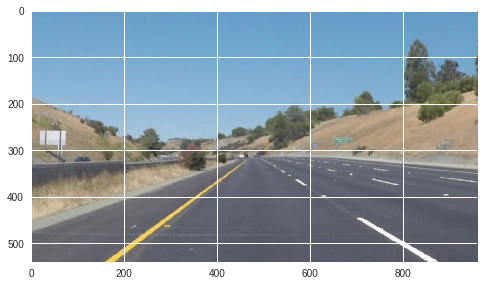

In [1]:
## Use this cell to fetch the image if you are not ishan bhatt using image's live URL
from PIL import Image
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt

url = "https://guydavis.github.io/img/posts/lane_detect_source.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
#plt.imsave
plt.imsave("TheImage.png", img)

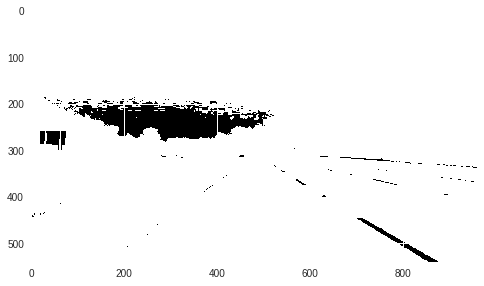

In [50]:
img = cv2.imread("TheImage.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, whiter = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
plt.imshow(whiter)

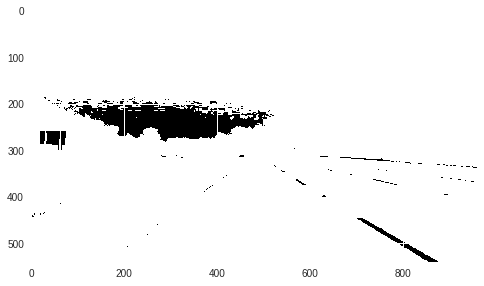

In [51]:
import numpy as np

edges = cv2.Canny(whiter, 50, 150, 7)
#yellow_low = np.array([0, 255, 255])
#yellow_white = np.array([255,255,255])
plt.imshow(whiter)


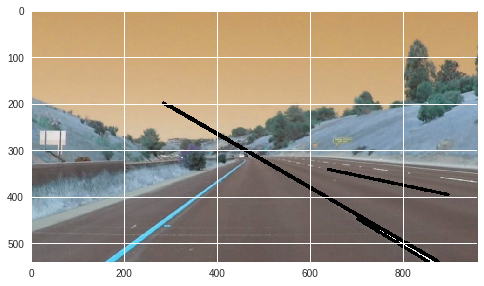

In [53]:
img = cv2.imread("TheImage.png")
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=50,lines=np.array([]), minLineLength = 25 ,maxLineGap=250)
for line in lines:
  x1,y1,x2,y2 = line[0]
  if y2 - y1 > 50:
    cv2.line(img, (x1,y1), (x2,y2), (0,0,0), thickness=5)

plt.imshow(img)


In [0]:
for 